In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.rcParams['font.sans-serif'] = [u'SimHei']
# mpl.rcParams['axes.unicode_minus'] = False

In [2]:
def clip(x, path):
    for i in range(len(x)):
        if x[i] >= path:
            x[i] %= path


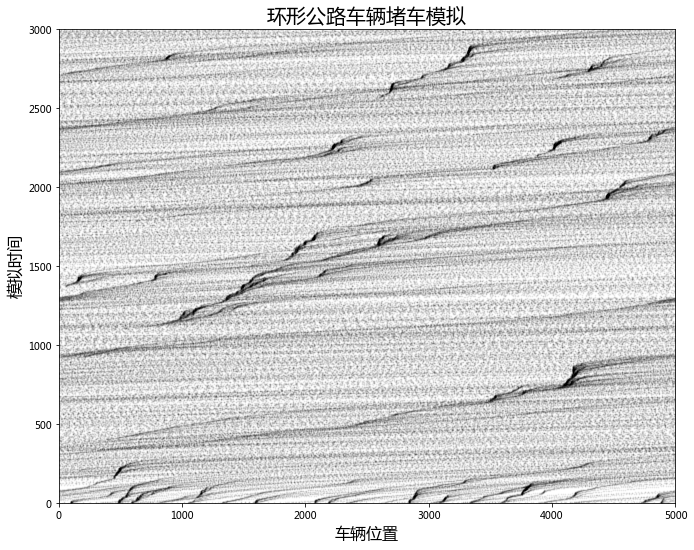

In [3]:
if __name__ == "__main__":

    path = 5000     # 环形公路的长度
    n = 100         # 公路中的车辆数目
    v0 = 50          # 车辆的初始速度
    p = 0.3         # 随机减速概率
    Times = 3000

    np.random.seed(0)
    x = np.random.rand(n) * path
    x.sort()
    v = np.tile([v0], n).astype(np.float)

    plt.figure(figsize=(10, 8), facecolor='w')
    for t in range(Times):
        plt.scatter(x, [t]*n, s=1, c='k', alpha=0.05)
        for i in range(n):
            if x[(i+1)%n] > x[i]:
                d = x[(i+1) % n] - x[i]   # 距离前车的距离
            else:
                d = path - x[i] + x[(i+1) % n]
            if v[i] < d:
                if np.random.rand() > p:
                    v[i] += 1
                else:
                    v[i] -= 1
            else:
                v[i] = d - 1
        v = v.clip(0, 150)
        x += v
        clip(x, path)
    plt.xlim(0, path)
    plt.ylim(0, Times)
    plt.xlabel(u'车辆位置', fontsize=16)
    plt.ylabel(u'模拟时间', fontsize=16)
    plt.title(u'环形公路车辆堵车模拟', fontsize=20)
    plt.tight_layout(pad=2)
    plt.show()